# Dynamic Profile Forcasting

###### Team ID : D03<br> <br> Sem : 5th<br> <br> Div : D

###### Topic Id : 15DMACP03
###### Project Title : Dynamic Profile Forecasting by Enedis

#### Problem Statement
Forecast 7 dynamic profile time-series, modelling the electricity consumption shape of several mass-market customer groups .The challenge is about forecasting dynamic profiles values from their past values.

#### Team Members
Shrenik H  : Rollno - 220 : USN - 01FE17BCS194<br>
Sourabh J  : Rollno - 240 : USN - 01FE17BCS214<br>
Shushant M : Rollno - 248 : USN - 01FE17BCS222<br>
Sweekar B  : Rollno - 253 : USN - 01FE17BCS227<br>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rcParams['figure.figsize'] = 15,6

from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data Exploration and Pre-processing


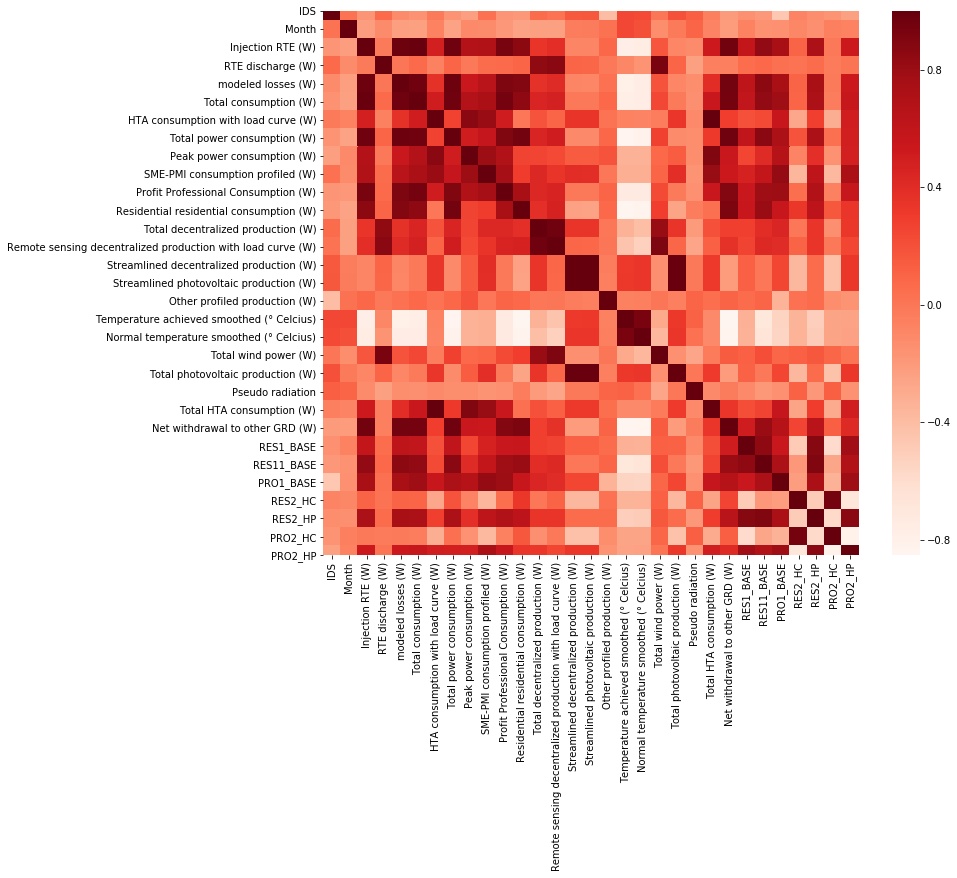

Null values in Rtrain are 
 Pseudo radiation    85.905772
PRO1_BASE           76.251996
PRO2_HC             76.251996
PRO2_HP             76.251996
dtype: float64
Null values in Ctrain are 
 Pseudo radiation    40.472175
dtype: float64
Columns Successfully Dropped


In [5]:
#Reading input and output training data
train_input=pd.read_csv("drive/My Drive/training_input.csv")
train_output=pd.read_csv("drive/My Drive/training_output.csv")

#Columns are in French. Hence, changing it to English  
train_input.columns=['IDS', 'TimeStamp_UTC', 'TimeStamp', 'Month', 'Injection RTE (W)','RTE discharge (W)', 'modeled losses (W)','Total consumption (W)','HTA consumption with load curve (W)','Total power consumption (W)', 'Peak power consumption (W)','SME-PMI consumption profiled (W)','Profit Professional Consumption (W)','Residential residential consumption (W)','Total decentralized production (W)','Remote sensing decentralized production with load curve (W)','Streamlined decentralized production (W)','Streamlined photovoltaic production (W)','Other profiled production (W)','Temperature achieved smoothed (° Celcius)','Normal temperature smoothed (° Celcius)','Total wind power (W)','Total photovoltaic production (W)', 'Pseudo radiation','Total HTA consumption (W)', 'Net withdrawal to other GRD (W)']
train_output.columns=['IDS','TimeStamp_UTC','TimeStamp','Month','RES1_BASE','RES11_BASE','PRO1_BASE','RES2_HC','RES2_HP','PRO2_HC','PRO2_HP']

#Merging both input and output training data on attributes IDS,Month,TimeStamp_UTC,TimeStamp
train=pd.merge(train_input,train_output,on =['IDS','Month','TimeStamp_UTC','TimeStamp'])

#Fixing Timestamp Format
train['TimeStamp']=pd.to_datetime((train.TimeStamp),utc=True).dt.tz_convert(None)

#Corelation Feature Selection
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

#Dividing data into Rtrain and Ctrain
Rtrain=train
Ctrain=train[train['TimeStamp']>=pd.to_datetime('01/11/2016',format='%d/%m/%Y')]

#Checking for Null values
Rtrain_nan = (Rtrain.isnull().sum() / Rtrain.shape[0])* 100
print("Null values in Rtrain are \n",Rtrain_nan[Rtrain_nan >0 ])
Ctrain_nan = (Ctrain.isnull().sum() / Ctrain.shape[0])* 100
print("Null values in Ctrain are \n",Ctrain_nan[Ctrain_nan >0 ])

#Dropping NULL Atrributes
Rtrain.drop(['Pseudo radiation','PRO1_BASE','PRO2_HC','PRO2_HP'],axis=1,inplace=True)
print("Columns Successfully Dropped")


# Check for Stationarity


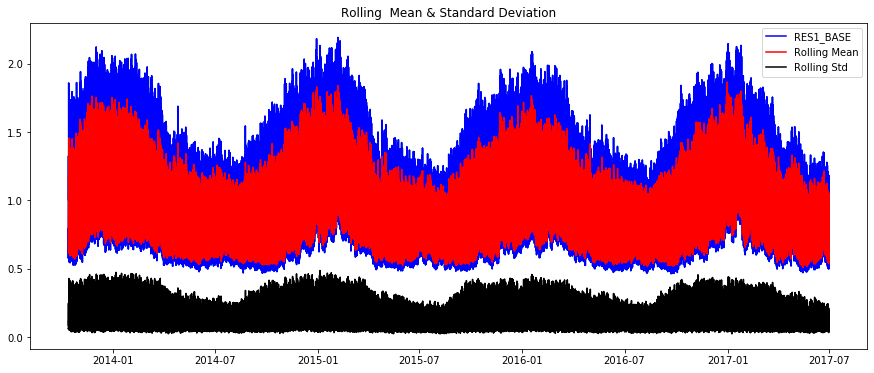

Results of Dickey-Fuller Test:
Test Statistic                    -5.505498
p-value                            0.000002
#Lags Used                        61.000000
Number of Observations Used    65074.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


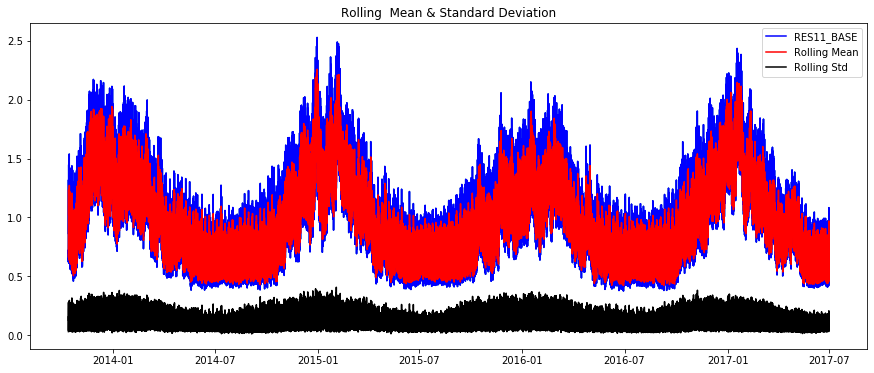

Results of Dickey-Fuller Test:
Test Statistic                    -3.653446
p-value                            0.004818
#Lags Used                        60.000000
Number of Observations Used    65075.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


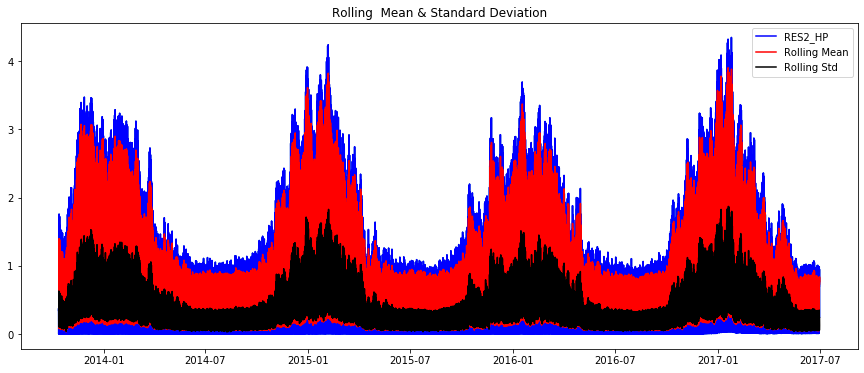

Results of Dickey-Fuller Test:
Test Statistic                    -2.979163
p-value                            0.036887
#Lags Used                        61.000000
Number of Observations Used    65074.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


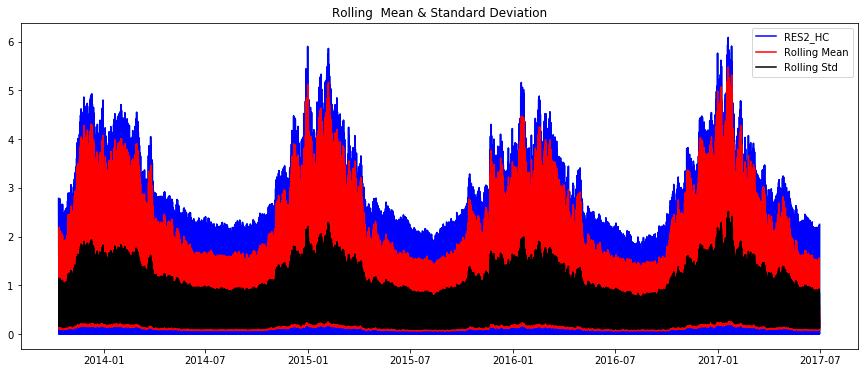

Results of Dickey-Fuller Test:
Test Statistic                    -2.516659
p-value                            0.111473
#Lags Used                        61.000000
Number of Observations Used    65074.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


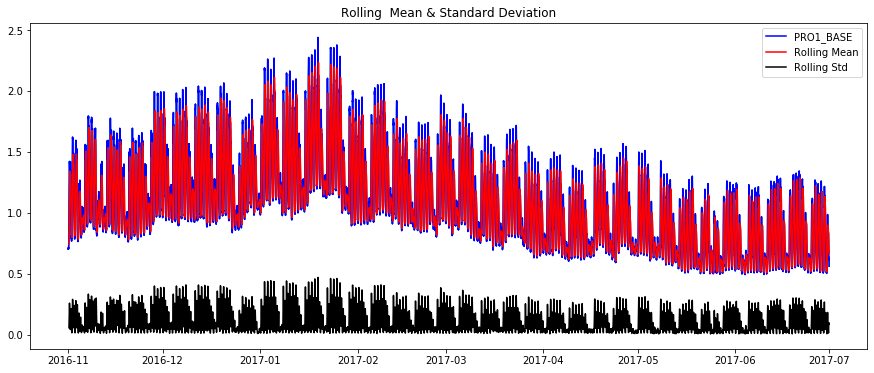

Results of Dickey-Fuller Test:
Test Statistic                    -2.985764
p-value                            0.036245
#Lags Used                        40.000000
Number of Observations Used    11571.000000
Critical Value (1%)               -3.430915
Critical Value (5%)               -2.861790
Critical Value (10%)              -2.566903
dtype: float64


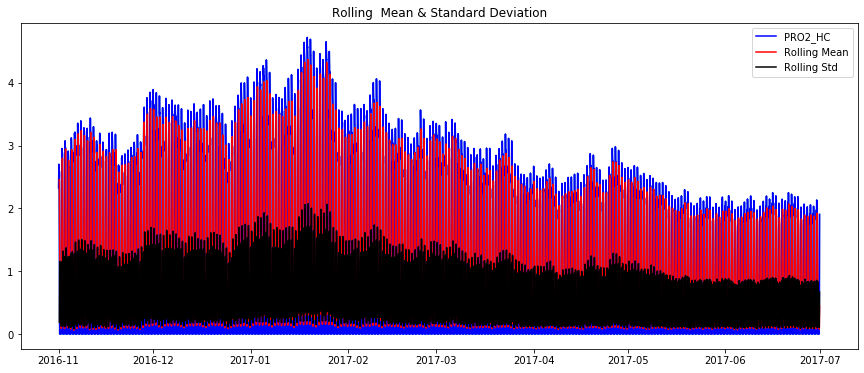

Results of Dickey-Fuller Test:
Test Statistic                -9.654546e+00
p-value                        1.405525e-16
#Lags Used                     4.000000e+01
Number of Observations Used    1.157100e+04
Critical Value (1%)           -3.430915e+00
Critical Value (5%)           -2.861790e+00
Critical Value (10%)          -2.566903e+00
dtype: float64


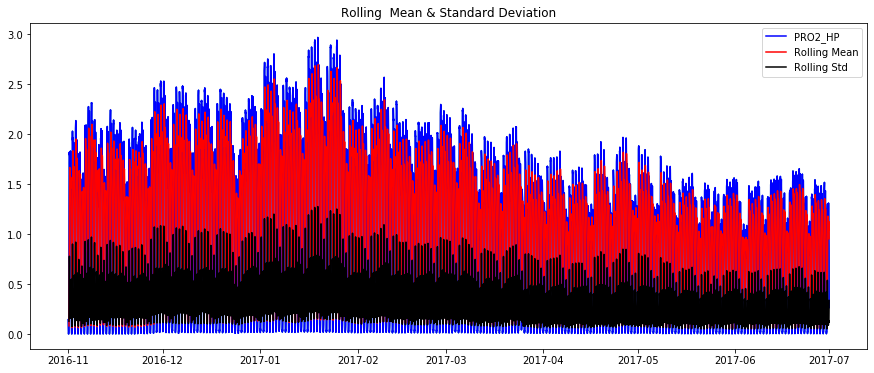

Results of Dickey-Fuller Test:
Test Statistic                    -4.855867
p-value                            0.000042
#Lags Used                        40.000000
Number of Observations Used    11571.000000
Critical Value (1%)               -3.430915
Critical Value (5%)               -2.861790
Critical Value (10%)              -2.566903
dtype: float64


In [11]:
Rtrain=Rtrain[Rtrain['TimeStamp']<pd.to_datetime('01/07/2017',format='%d/%m/%Y')]
Ctrain=Ctrain[Ctrain['TimeStamp']<pd.to_datetime('01/07/2017',format='%d/%m/%Y')]

Rtrain=Rtrain.set_index('TimeStamp',drop=True)
Ctrain=Ctrain.set_index('TimeStamp',drop=True)

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,column):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    rcParams['figure.figsize'] = 15,6

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = column)
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()
    
    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

def test_stationarity_for_Residential_Profiles(column):
    ts=Rtrain[column]
    rcParams['figure.figsize'] = 15,6

    plt.plot(ts)
    test_stationarity(ts,column)
    
Residential_profile=['RES1_BASE','RES11_BASE','RES2_HP','RES2_HC']
for r in Residential_profile:
    test_stationarity_for_Residential_Profiles(r)

def test_stationarity_for_Commertial_Profiles(column):
    Ctrain1=Ctrain
    ts=Ctrain1[column]
    plt.plot(ts)
    test_stationarity(ts,column)
Commertial_profile=['PRO1_BASE','PRO2_HC','PRO2_HP']
for c in Commertial_profile:
    test_stationarity_for_Commertial_Profiles(c)

#### Make Data Stationary
From Above test , we get <br>
Stationary attributes as  <b>RES1_BASE , RES11_BASE , PRO2_HC , PRO2_HP</b><br>
Non-Stationary attributes as  <b>RES2_HC , RES2_HP , PRO1_BASE</b><br>

So , convert Non-Stationary attributes to Stationary

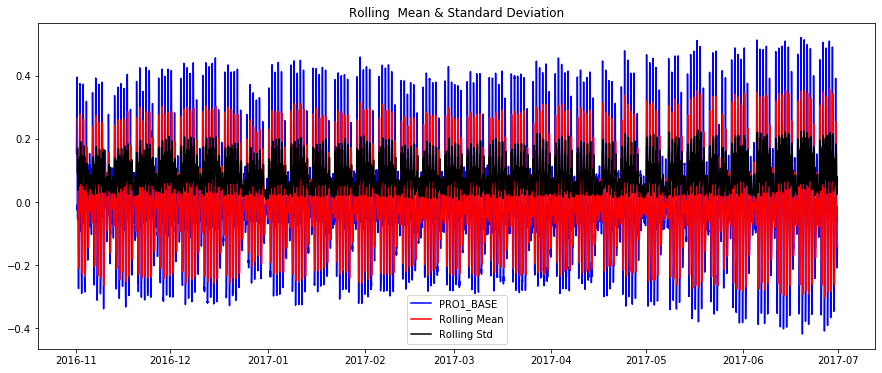

Results of Dickey-Fuller Test:
Test Statistic                   -21.800438
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    11560.000000
Critical Value (1%)               -3.430916
Critical Value (5%)               -2.861790
Critical Value (10%)              -2.566903
dtype: float64


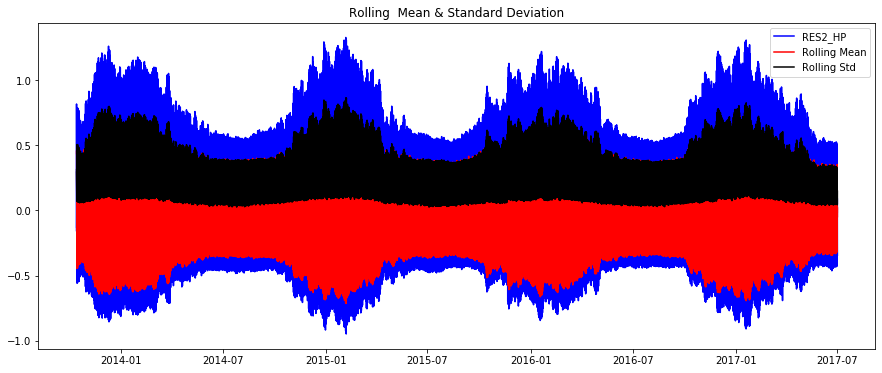

Results of Dickey-Fuller Test:
Test Statistic                   -32.597768
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    65063.000000
Critical Value (1%)               -3.430451
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


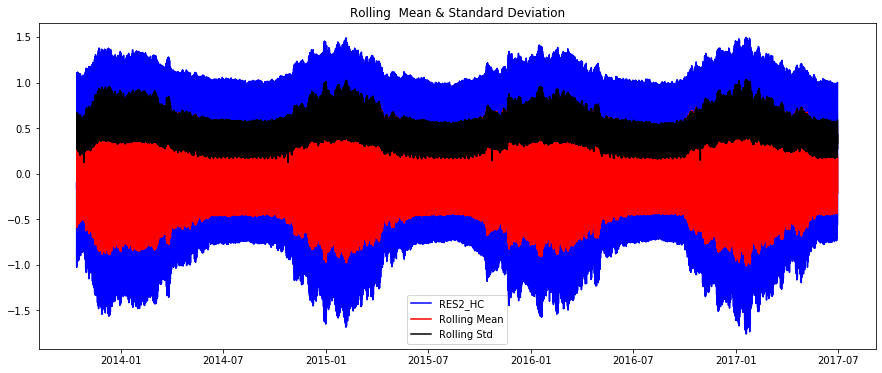

Results of Dickey-Fuller Test:
Test Statistic                   -43.550822
p-value                            0.000000
#Lags Used                        59.000000
Number of Observations Used    65065.000000
Critical Value (1%)               -3.430451
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [12]:
ts=Ctrain['PRO1_BASE']
ts_log = np.log(ts)

moving_avg = ts_log.rolling(12).mean()

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace = True)
Ctrain['PRO1_BASE']=ts_log_moving_avg_diff
test_stationarity(ts_log_moving_avg_diff,'PRO1_BASE')

def make_data_stationary(column):
    ts=Rtrain[column]
    ts_sqrt=np.sqrt(ts)
    
    moving_avg = ts_sqrt.rolling(12).mean()


    ts_sqrt_moving_avg_diff = ts_sqrt - moving_avg
    ts_sqrt_moving_avg_diff.dropna(inplace = True)
    Rtrain[column]=ts_sqrt_moving_avg_diff
    test_stationarity(ts_sqrt_moving_avg_diff,column)

non_stationary_columns=['RES2_HP','RES2_HC']
for column in non_stationary_columns:
    make_data_stationary(column)

# Models


In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
from fbprophet import Prophet
import lightgbm as lgb
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


%matplotlib inline

In [0]:
def fun1(model,x,y):
  train_sizes, train_scores, test_scores = learning_curve(
          model, x, y, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 5))

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  trace1 = {
    "name": "Training Scores", 
    "type": "scatter", 
    "x": train_sizes, 
    "y": train_scores_mean
  }
  trace2 = {
    "name": "Test Scores", 
    "type": "scatter", 
    "x": train_sizes, 
    "y": test_scores_mean
  }

  #data = go.Data([trace1, trace2])
  layout = {
    "title": "Learning Curve of Linear Regression", 
    "width": 600, 
    "xaxis": {
      "title": "Training Size", 
      "titlefont": {
        "size": 18, 
        "color": "black", 
        "family": "Courier New, monospace"
      }
    }, 
    "yaxis": {
      "title": "Scores", 
      "titlefont": {
        "size": 18, 
        "color": "black", 
        "family": "Courier New, monospace"
      }
    }, 
    "height": 1000, 
    "width" : 1000,
    "autosize": False, 
    "showlegend": True
  }
  #fig = go.Figure(data=data, layout=layout )
  #fig.show()
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")
  plt.xlabel('Training Samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

RMSE: 0.236778


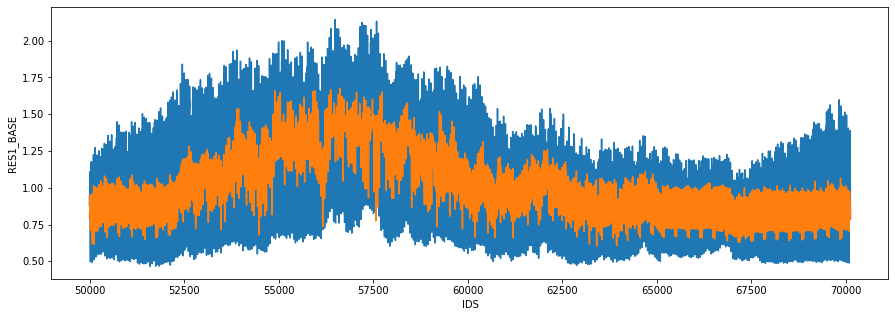

In [25]:
#Linear_Regression : - RES1_BASE


Rtrain1=Rtrain[:50000]
Rtest1=Rtrain[50000:]

train_features=pd.DataFrame()
train_features["Normal temperature"]=Rtrain1['modeled losses (W)']
train_features["Total HTA cons"]=Rtrain1['Profit Professional Consumption (W)']
train_features["Total HTA cons1"]=Rtrain1["Residential residential consumption (W)"]

poly = PolynomialFeatures(degree=2)
train_features = poly.fit_transform(train_features)

regressor = LinearRegression()  
regressor.fit(train_features,Rtrain1['RES1_BASE'])

test_features=pd.DataFrame()
test_features["Normal temperature"]=Rtest1['modeled losses (W)']
test_features["Total HTA cons"]=Rtest1['Profit Professional Consumption (W)']
test_features["Total HTA cons1"]=Rtest1["Residential residential consumption (W)"]

poly = PolynomialFeatures(degree=2)
test_features = poly.fit_transform(test_features)

ytest=regressor.predict(np.array(test_features))
mse=metrics.mean_squared_error(Rtest1['RES1_BASE'], ytest)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("IDS")
plt.ylabel("RES1_BASE")
plt.plot(Rtest1['RES1_BASE'])
plt.plot(range(50000,70128),ytest)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



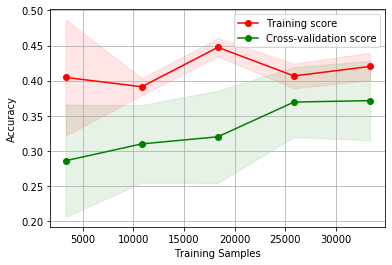

In [28]:
from sklearn.model_selection import learning_curve

fun1(regressor,train_features,Rtrain1['RES1_BASE'])

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[11:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.241538


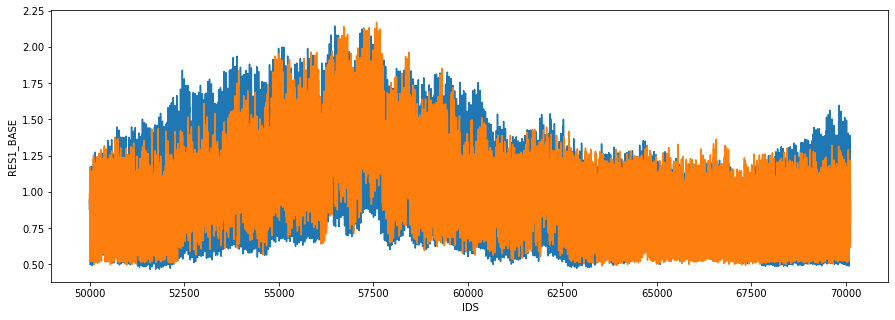

In [31]:
#XGBRegressor
#from sklearn.model_selection import train_test_split

Rtrain1=Rtrain[:50000]
Rtest1=Rtrain[50000:]

#Rtrain1.drop(['TimeStamp_UTC','TimeStamp','RES1_BASE','RES11_BASE','RES2_HP','RES2_HC'],axis=1,inplace=True)
train_features=pd.DataFrame()
train_features["Normal temperature"]=Rtrain1['modeled losses (W)']
train_features["Total HTA cons"]=Rtrain1['Profit Professional Consumption (W)']
train_features["Total HTA cons1"]=Rtrain1["Residential residential consumption (W)"]

#Rtest1.drop(['TimeStamp_UTC','TimeStamp'],axis=1,inplace=True)

test_features=pd.DataFrame()
test_features["Normal temperature"]=Rtest1['modeled losses (W)']
test_features["Total HTA cons"]=Rtest1['Profit Professional Consumption (W)']
test_features["Total HTA cons1"]=Rtest1["Residential residential consumption (W)"]

base_model = xgb.XGBRegressor(n_estimators = 500, max_depth=200,min_samples_leaf=2,random_state = 42)
base_model.fit(train_features, Rtrain1['RES1_BASE'])
predictions = base_model.predict(test_features)
mse=metrics.mean_squared_error(Rtest1['RES1_BASE'], predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("IDS")
plt.ylabel("RES1_BASE")
plt.plot(Rtest1['RES1_BASE'])
plt.plot(range(50000,70128),predictions)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



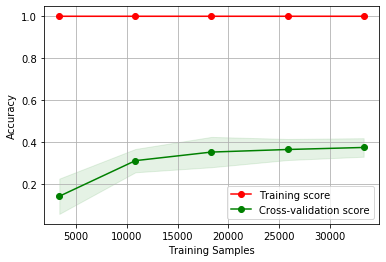

In [32]:
fun1(base_model,train_features,Rtrain1['RES1_BASE'])

RMSE: 0.226311


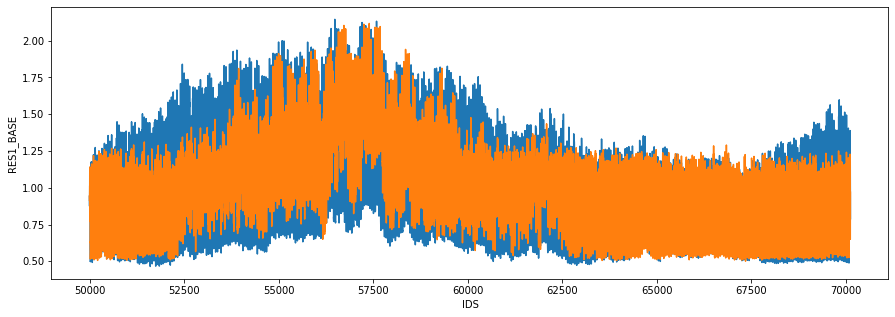

In [33]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split

Rtrain1=Rtrain[:50000]
Rtest1=Rtrain[50000:]

#Rtrain1.drop(['TimeStamp_UTC','TimeStamp','RES1_BASE','RES11_BASE','RES2_HP','RES2_HC'],axis=1,inplace=True)
train_features=pd.DataFrame()
train_features["Normal temperature"]=Rtrain1['modeled losses (W)']
train_features["Total HTA cons"]=Rtrain1['Profit Professional Consumption (W)']
train_features["Total HTA cons1"]=Rtrain1["Residential residential consumption (W)"]

#Rtest1.drop(['TimeStamp_UTC','TimeStamp'],axis=1,inplace=True)

test_features=pd.DataFrame()
test_features["Normal temperature"]=Rtest1['modeled losses (W)']
test_features["Total HTA cons"]=Rtest1['Profit Professional Consumption (W)']
test_features["Total HTA cons1"]=Rtest1["Residential residential consumption (W)"]

base_model = RandomForestRegressor(n_estimators = 500, max_depth=200,min_samples_leaf=2,random_state = 42)
base_model.fit(train_features, Rtrain1['RES1_BASE'])
predictions = base_model.predict(test_features)
mse=metrics.mean_squared_error(Rtest1['RES1_BASE'], predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("IDS")
plt.ylabel("RES1_BASE")
plt.plot(Rtest1['RES1_BASE'])
plt.plot(range(50000,70128),predictions)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



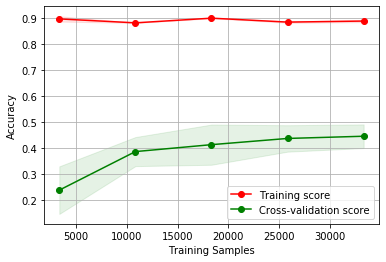

In [34]:
fun1(base_model,train_features,Rtrain1['RES1_BASE'])

#### Applying all the given attributes in models

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[13:02:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.133346


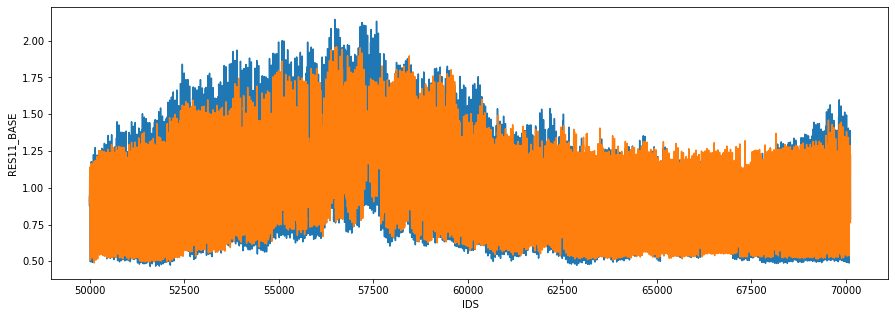

In [12]:
#XGBRegressor
from sklearn.model_selection import train_test_split

Rtrain1=Rtrain[:50000]
Rtest1=Rtrain[50000:]

train_labels=Rtrain1['RES1_BASE']
test_labels=Rtest1['RES1_BASE']

Rtrain1=Rtrain1.drop(['TimeStamp_UTC','TimeStamp','RES1_BASE','RES11_BASE','RES2_HP','RES2_HC'],axis=1)
train_features=Rtrain1
# train_features["Normal temperature"]=Rtrain1['modeled losses (W)']
# train_features["Total HTA cons"]=Rtrain1['Profit Professional Consumption (W)']
# train_features["Total HTA cons1"]=Rtrain1["Residential residential consumption (W)"]

Rtest1=Rtest1.drop(['TimeStamp_UTC','TimeStamp','RES1_BASE','RES11_BASE','RES2_HP','RES2_HC'],axis=1)
test_features=Rtest1
# test_features["Normal temperature"]=Rtest1['modeled losses (W)']
# test_features["Total HTA cons"]=Rtest1['Profit Professional Consumption (W)']
# test_features["Total HTA cons1"]=Rtest1["Residential residential consumption (W)"]

base_model = xgb.XGBRegressor(n_estimators = 500, max_depth=200,random_state = 42)
base_model.fit(train_features, train_labels)
predictions = base_model.predict(test_features)
mse=metrics.mean_squared_error(test_labels, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("IDS")
plt.ylabel("RES11_BASE")
plt.plot(test_labels)
plt.plot(range(50000,70128),predictions)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



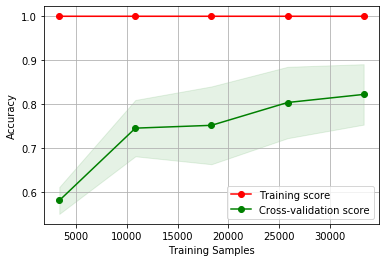

In [13]:
fun1(base_model,train_features,train_labels)

RMSE: 0.136921


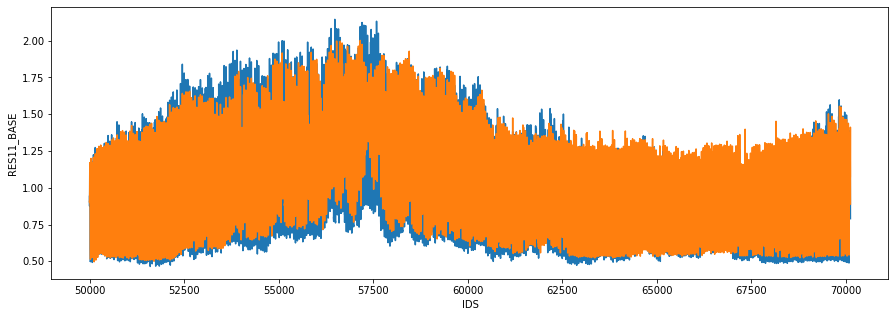

In [38]:
_#Random Forest Regressor
from sklearn.model_selection import train_test_split

Rtrain1=Rtrain[:50000]
Rtest1=Rtrain[50000:]

train_labels=Rtrain1['RES1_BASE']
test_labels=Rtest1['RES1_BASE']

Rtrain1=Rtrain1.drop(['TimeStamp_UTC','TimeStamp','RES1_BASE','RES11_BASE','RES2_HP','RES2_HC'],axis=1)
train_features=Rtrain1
# train_features["Normal temperature"]=Rtrain1['modeled losses (W)']
# train_features["Total HTA cons"]=Rtrain1['Profit Professional Consumption (W)']
# train_features["Total HTA cons1"]=Rtrain1["Residential residential consumption (W)"]

Rtest1=Rtest1.drop(['TimeStamp_UTC','TimeStamp','RES1_BASE','RES11_BASE','RES2_HP','RES2_HC'],axis=1)
test_features=Rtest1
# test_features["Normal temperature"]=Rtest1['modeled losses (W)']
# test_features["Total HTA cons"]=Rtest1['Profit Professional Consumption (W)']
# test_features["Total HTA cons1"]=Rtest1["Residential residential consumption (W)"]

base_model = RandomForestRegressor(n_estimators = 500, max_depth=200,min_samples_leaf=2,random_state = 42)
base_model.fit(train_features, train_labels)
predictions = base_model.predict(test_features)
mse=metrics.mean_squared_error(test_labels, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("IDS")
plt.ylabel("RES11_BASE")
plt.plot(test_labels)
plt.plot(range(50000,70128),predictions)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



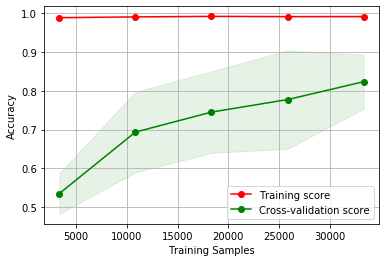

In [15]:
fun1(base_model,train_features,train_labels)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE: 0.357246


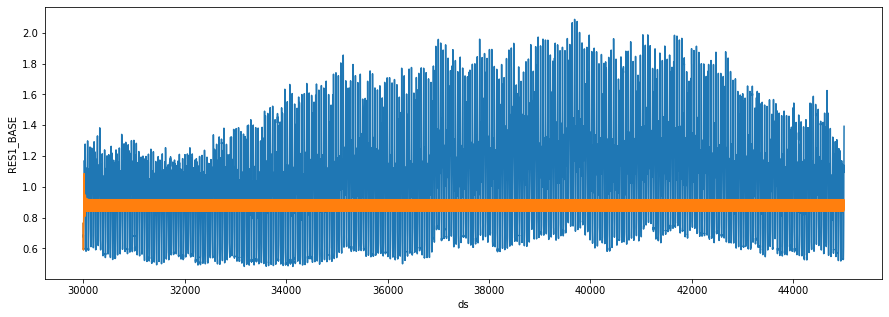

In [0]:
#SARIMA : - RES1_BASE

Rtrain1=Rtrain['RES1_BASE']
mod = sm.tsa.statespace.SARIMAX(Rtrain1[:30000],
                                order=(11,0,3),
                                seasonal_order=(1,1,0,12),
                                enforce_stationary=False,
                                enforce_invertablity=False)
results=mod.fit()
forecast_values = results.get_forecast(steps=15000) 
x=forecast_values.predicted_mean

mse = mean_squared_error(Rtrain1[30000:45000], x)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("ds")
plt.ylabel("RES1_BASE")
plt.plot(Rtrain1[30000:45000])
plt.plot(x)

RMSE: 0.114385


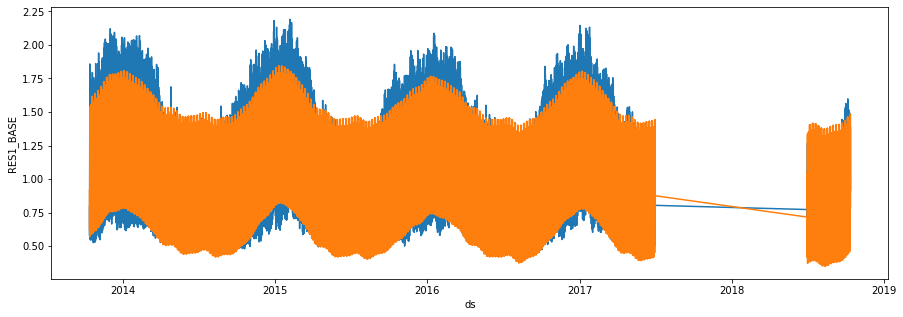

In [0]:
#FB-Prophet : - RES1_BASE

#Rtrain=Rtrain.set_index('TimeStamp',drop=True)
#Ctrain=Ctrain.set_index('TimeStamp',drop=True)

df=pd.DataFrame()

def fbProphet_Rtrain(column):
    ds=pd.DataFrame()

    ds[column]=Rtrain[column]
    ds=ds.reset_index()
    ds.columns = ['ds','y']
    model = Prophet(yearly_seasonality=True)
    model.fit(ds)
    
    ds1=pd.DataFrame()
    
    ds1['ds']=Rtrain.index
    
    ds_test_fcst = model.predict(ds)
    
    df[column] = ds_test_fcst['yhat']

col=['RES1_BASE']
for c in col:
    fbProphet_Rtrain(c)    
    
mse = mean_squared_error(Rtrain['RES1_BASE'], df['RES1_BASE'])
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.xlabel("ds")
plt.ylabel("RES1_BASE")
plt.plot(Rtrain['RES1_BASE'])
plt.plot(Rtrain.index,df['RES1_BASE'])

# FB-Prophet

Fixing TimeStamp format....
Fixed TimeStamp format


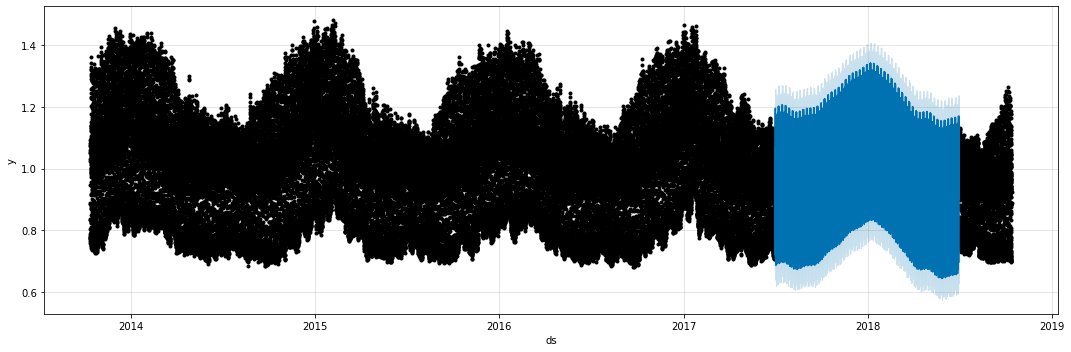

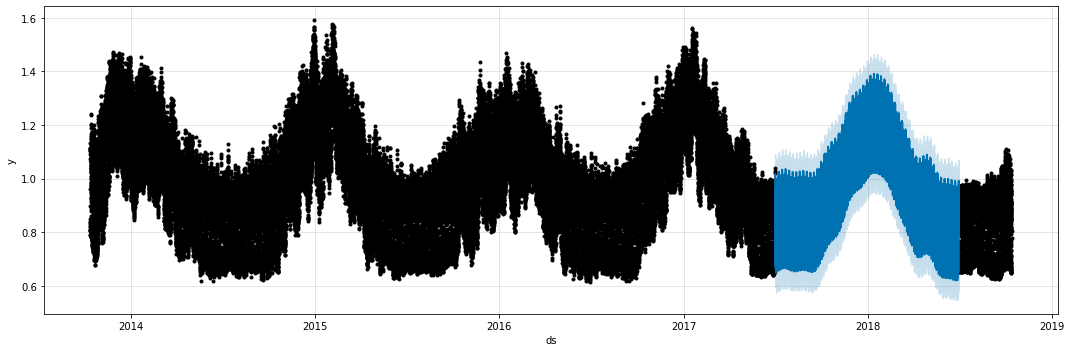

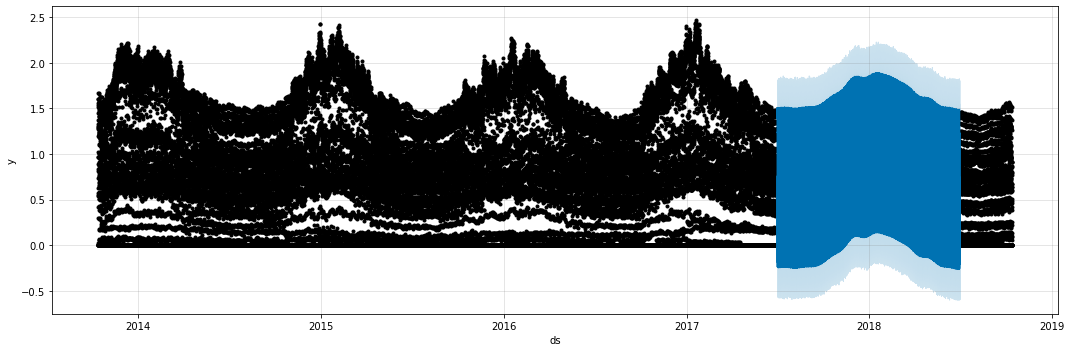

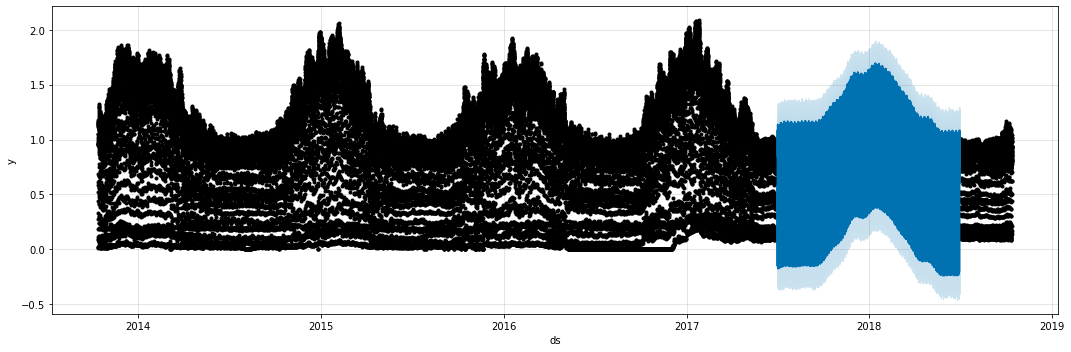

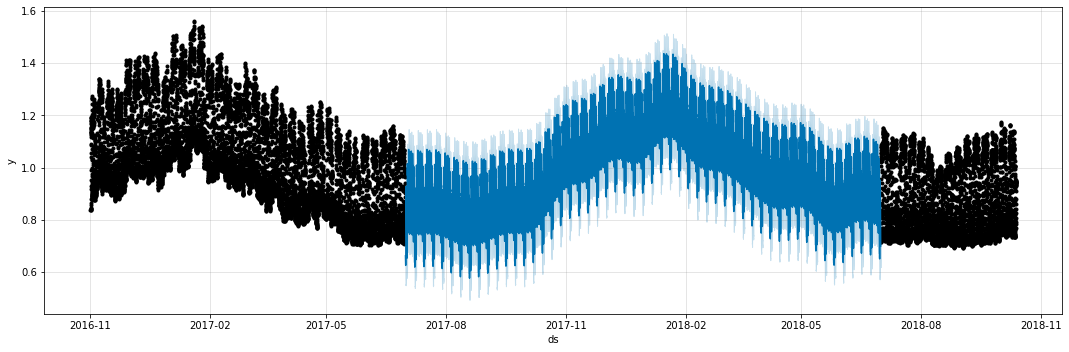

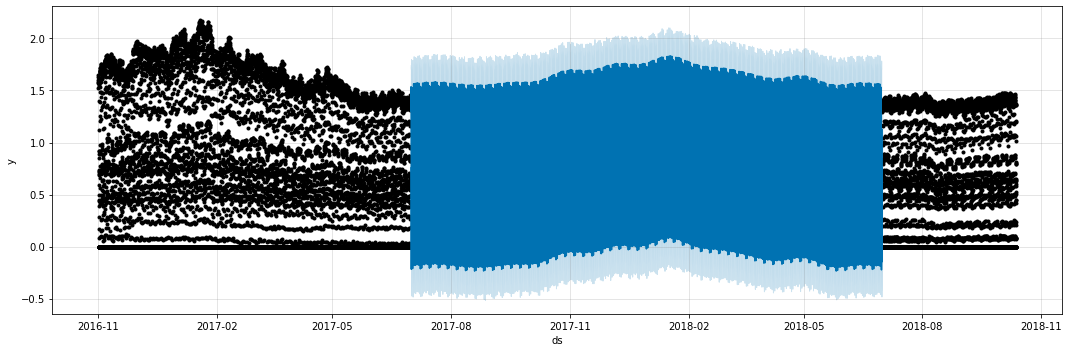

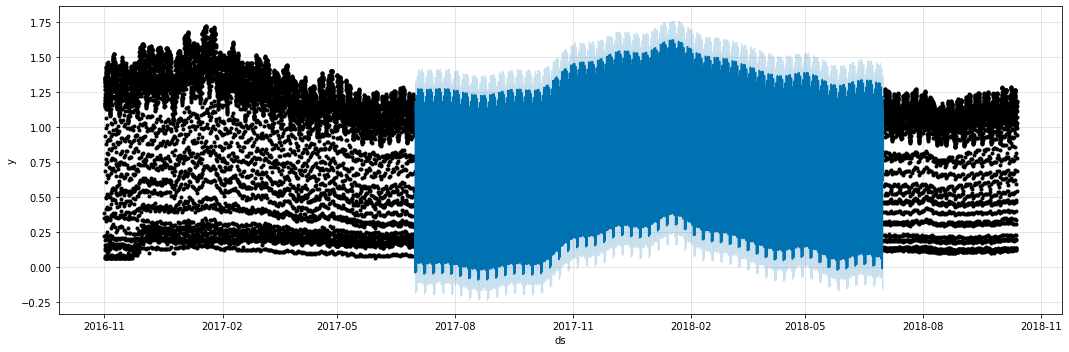

In [0]:
df=pd.DataFrame()

Rtrain=Rtrain.set_index('TimeStamp',drop=True)
Ctrain=Ctrain.set_index('TimeStamp',drop=True)

trainsample=Rtrain
testsample=pd.read_csv("testing_input.csv")
testsample.columns=['IDS', 'TimeStamp_UTC', 'TimeStamp', 'Month', 'Injection RTE (W)','RTE discharge (W)', 'modeled losses (W)','Total consumption (W)','HTA consumption with load curve (W)','Total power consumption (W)', 'Peak power consumption (W)','SME-PMI consumption profiled (W)','Profit Professional Consumption (W)','Residential residential consumption (W)','Total decentralized production (W)','Remote sensing decentralized production with load curve (W)','Streamlined decentralized production (W)','Streamlined photovoltaic production (W)','Other profiled production (W)','Temperature achieved smoothed (° Celcius)','Normal temperature smoothed (° Celcius)','Total wind power (W)','Total photovoltaic production (W)', 'Pseudo radiation','Total HTA consumption (W)', 'Net withdrawal to other GRD (W)']
print('Fixing TimeStamp format....')
testsample['TimeStamp']=pd.to_datetime((testsample.TimeStamp),utc=True).dt.tz_convert(None)
print('Fixed TimeStamp format')

#Training Residential Data
def fbProphet_Rtrain(column):
    ds=pd.DataFrame()

    ds[column]=np.sqrt(trainsample[column])
    ds=ds.reset_index()
    ds.columns = ['ds','y']
    model = Prophet(yearly_seasonality=True)
    model.fit(ds)
    
    ds1=pd.DataFrame()
    
    ds1['ds']=testsample['TimeStamp']
    
    ds_test_fcst = model.predict(ds1)
    
    df[column] = np.square(ds_test_fcst['yhat'])
    
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    fig = model.plot(ds_test_fcst, ax=ax)

col=['RES1_BASE','RES11_BASE','RES2_HC','RES2_HP']
for c in col:
    fbProphet_Rtrain(c)   
    
trainsample=Ctrain

def fbProphet_Ctrain(column):
    ds=pd.DataFrame()

    ds[column]=np.sqrt(trainsample[column])
    ds=ds.reset_index()
    ds.columns = ['ds','y']
    model = Prophet(yearly_seasonality=True)
    model.fit(ds)
    
    ds1=pd.DataFrame()
    
    ds1['ds']=testsample['TimeStamp']
    
    ds_test_fcst = model.predict(ds1)
    
    df[column] = np.square(ds_test_fcst['yhat'])
    
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    fig = model.plot(ds_test_fcst, ax=ax)

col=['PRO1_BASE','PRO2_HC','PRO2_HP']
for c in col:
    fbProphet_Ctrain(c)  

In [0]:
#Storing in the output file for submission
#testsample.columns=['IDS', 'Horodate_UTC', 'Horodate', 'Mois', 'Injection RTE (W)','Refoulement RTE (W)', 'Pertes modélisées (W)','Consommations totale (W)','Consommation HTA télérelevée à courbe de charge (W)','Consommation totale profilée (W)', 'Consommation HTA profilée (W)','Consommation PME-PMI profilée (W)','Consommation professionnelle profilée (W)','Consommation résidentielle profilée (W)','Production décentralisée totale (W)','Production décentralisée télérelevée à courbe de charge (W)','Production décentralisée profilée (W)','Production photovoltaïque profilée (W)','Production autre profilée (W)','Température réalisée lissée (°Celcius)','Température normale lissée (°Celcius)','Production éolienne totale (W)','Production photovoltaïque totale (W)', 'Pseudo rayonnement','Consommation HTA totale (W)', 'Soutirage net vers autres GRD (W)']
df['IDS']=testsample['IDS']
df['Horodate']=testsample['TimeStamp']
df['Horodate_UTC']=testsample['TimeStamp_UTC']
df['Mois']=testsample['Month']
df=df[['IDS', 'Horodate_UTC', 'Horodate', 'Mois', 'RES1_BASE', 'RES11_BASE',
       'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP']]
df.to_csv("testing_output.csv",index=False)

# RandomForest with MultiOutputRegressor

Automatically created module for IPython interactive environment
Automatically created module for IPython interactive environment


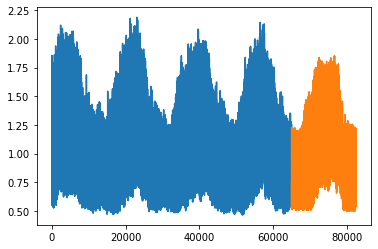

In [36]:
df=pd.DataFrame()

test=pd.read_csv("drive/My Drive/testing_input.csv")
test.columns=['IDS', 'TimeStamp_UTC', 'TimeStamp', 'Month', 'Injection RTE (W)','RTE discharge (W)', 'modeled losses (W)','Total consumption (W)','HTA consumption with load curve (W)','Total power consumption (W)', 'Peak power consumption (W)','SME-PMI consumption profiled (W)','Profit Professional Consumption (W)','Residential residential consumption (W)','Total decentralized production (W)','Remote sensing decentralized production with load curve (W)','Streamlined decentralized production (W)','Streamlined photovoltaic production (W)','Other profiled production (W)','Temperature achieved smoothed (° Celcius)','Normal temperature smoothed (° Celcius)','Total wind power (W)','Total photovoltaic production (W)', 'Pseudo radiation','Total HTA consumption (W)', 'Net withdrawal to other GRD (W)']

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=500,criterion='mse',max_depth=None,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,bootstrap=True,oob_score=False,n_jobs=-1,random_state=None,verbose=0))

testi=Rtrain
test1=test
testi=testi.drop(['TimeStamp','TimeStamp_UTC','RES1_BASE','RES11_BASE','RES2_HC','RES2_HP'],axis=1)
test1=test1.drop(['TimeStamp','TimeStamp_UTC','Pseudo radiation'],axis=1)

y_train=Rtrain[['RES1_BASE','RES11_BASE','RES2_HC','RES2_HP']]

regr_multirf.fit(testi, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(test1)

y=pd.DataFrame(y_multirf)


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=500,criterion='mse',max_depth=None,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,bootstrap=True,oob_score=False,n_jobs=-1,random_state=None,verbose=0))

testi=Ctrain
test1=test
testi=testi.drop(['Pseudo radiation','TimeStamp','TimeStamp_UTC','PRO1_BASE','PRO2_HC','PRO2_HP','RES1_BASE','RES11_BASE','RES2_HC','RES2_HP'],axis=1)
test1=test1.drop(['TimeStamp','TimeStamp_UTC','Pseudo radiation'],axis=1)

y_train=Ctrain[['PRO1_BASE','PRO2_HC','PRO2_HP']]

regr_multirf.fit(testi, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(test1)

y1=pd.DataFrame(y_multirf)

df=pd.DataFrame()
df['RES1_BASE']=y[0]
df['RES11_BASE']=y[1]
df['RES2_HC']=y[2]
df['RES2_HP']=y[3]
df['PRO1_BASE']=y1[0]
df['PRO2_HC']=y1[1]
df['PRO2_HP']=y1[2]

plt.plot(range(0,65000),Rtrain['RES1_BASE'][:65000])
plt.plot(range(65000,(65000+17520)),y[0])

In [0]:
testsample=pd.read_csv("drive/My Drive/testing_input.csv")
testsample.columns=['IDS', 'TimeStamp_UTC', 'TimeStamp', 'Month', 'Injection RTE (W)','RTE discharge (W)', 'modeled losses (W)','Total consumption (W)','HTA consumption with load curve (W)','Total power consumption (W)', 'Peak power consumption (W)','SME-PMI consumption profiled (W)','Profit Professional Consumption (W)','Residential residential consumption (W)','Total decentralized production (W)','Remote sensing decentralized production with load curve (W)','Streamlined decentralized production (W)','Streamlined photovoltaic production (W)','Other profiled production (W)','Temperature achieved smoothed (° Celcius)','Normal temperature smoothed (° Celcius)','Total wind power (W)','Total photovoltaic production (W)', 'Pseudo radiation','Total HTA consumption (W)', 'Net withdrawal to other GRD (W)']

df['IDS']=testsample['IDS']
df['Horodate']=testsample['TimeStamp']
df['Horodate_UTC']=testsample['TimeStamp_UTC']
df['Mois']=testsample['Month']
df=df[['IDS', 'Horodate_UTC', 'Horodate', 'Mois', 'RES1_BASE', 'RES11_BASE',
       'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP']]
df.to_csv("testing_output.csv",index=False)

In [0]:
#Finding Average of FBProphet and Random Regressor

t1=pd.read_csv("testing_output(18.46).csv")
t2=pd.read_csv("testing_output(16.44).csv")

df=t1

df['RES1_BASE']=(t1['RES1_BASE']+t2['RES1_BASE'])/2

df['RES11_BASE']=(t1['RES11_BASE']+t2['RES11_BASE'])/2

df['RES2_HP']=(t1['RES2_HP']+t2['RES2_HP'])/2

df['RES2_HC']=(t1['RES2_HC']+t2['RES2_HC'])/2

df['PRO1_BASE']=(t1['PRO1_BASE']+t2['PRO1_BASE'])/2

df['PRO2_HP']=(t1['PRO2_HP']+t2['PRO2_HP'])/2

df['PRO2_HC']=(t1['PRO2_HC']+t2['PRO2_HC'])/2

df.to_csv("testing_output.csv",index=False)